In [8]:
import sys
sys.path.append("../")

from utils import *
from tqdm.auto import tqdm
from generate_parameter_sample import PARAMETER_RANGES
from SALib.analyze import pawn, morris, delta
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

# CPT

In [9]:
with open("../cpt_sen_welfare", 'rb') as f:
    sen_cpt = pickle.load(f)

problem = {
    'num_vars': 6,
    'names': [r"$\alpha$", r"$\gamma$", r"$\lambda$", r"$r$",  r"$A$", r"$S$"],
    'bounds': [PARAMETER_RANGES[k] for k in PARAMETER_RANGES]
}

In [5]:
X = []
Y = []
for i,f in tqdm(enumerate(os.listdir("../cpt"))):
    with open(os.path.join("../cpt", f), "rb") as f:
        P = pickle.load(f)["params"]
    if 0.3 < P["alpha"] < 0.7:
        X.append(
            (P["alpha"],P["gamma"],P["lambda"],P["rate"],P["A"],P["shock_size"])
        )    
        Y.append(sen_cpt[i])

0it [00:00, ?it/s]

/Users/charlesdupont/Documents/code/wealth-health/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


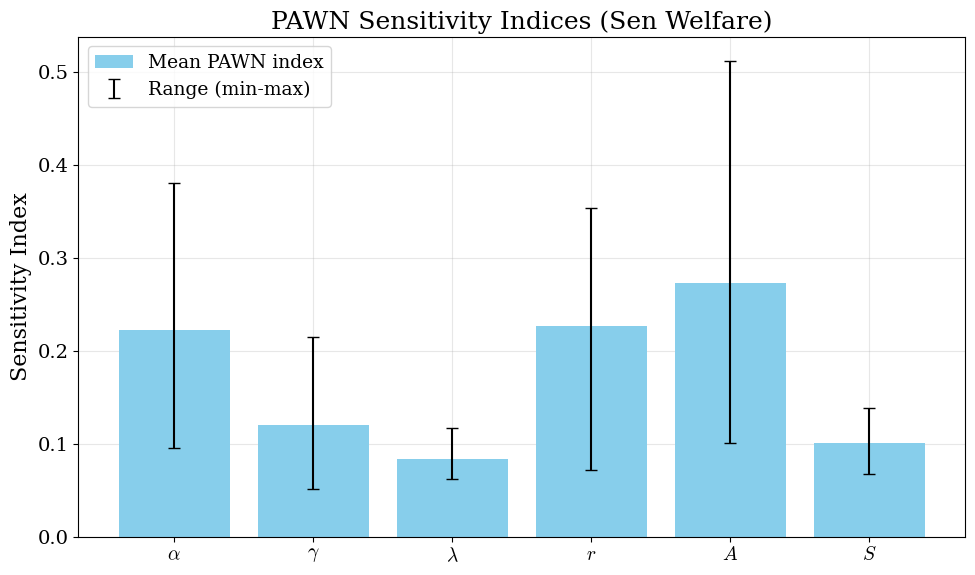

In [11]:
results = pawn.analyze(problem, np.array(X), np.array(Y))

x = np.arange(len(results['names']))
plt.figure(figsize=(10,6))

# Mean ± min/max
plt.bar(x, results['mean'], color='skyblue', label='Mean PAWN index')
plt.errorbar(
    x,
    results['mean'],
    yerr=[results['mean'] - results['minimum'], results['maximum'] - results['mean']],
    fmt='none',
    ecolor='black',
    capsize=4,
    label='Range (min-max)'
)

plt.xticks(x, results['names'])
plt.ylabel("Sensitivity Index")
plt.title("PAWN Sensitivity Indices (Sen Welfare)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# No CPT

In [13]:
with open("../nocpt_sen_welfare", 'rb') as f:
    sen_nocpt = pickle.load(f)

problem = {
    'num_vars': 4,
    'names': [r"$\alpha$", r"$r$",  r"$A$", r"$S$"],
    'bounds': [PARAMETER_RANGES[k] for k in ["alpha", "rate", "A", "shock_size"]]
}

In [14]:
X = []
Y = []
for i,f in tqdm(enumerate(os.listdir("../nocpt"))):
    with open(os.path.join("../nocpt", f), "rb") as f:
        P = pickle.load(f)["params"]
    if 0.3 < P["alpha"] < 0.7:
        X.append(
            (P["alpha"],P["rate"],P["A"],P["shock_size"])
        )    
        Y.append(sen_nocpt[i])

0it [00:00, ?it/s]

/Users/charlesdupont/Documents/code/wealth-health/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


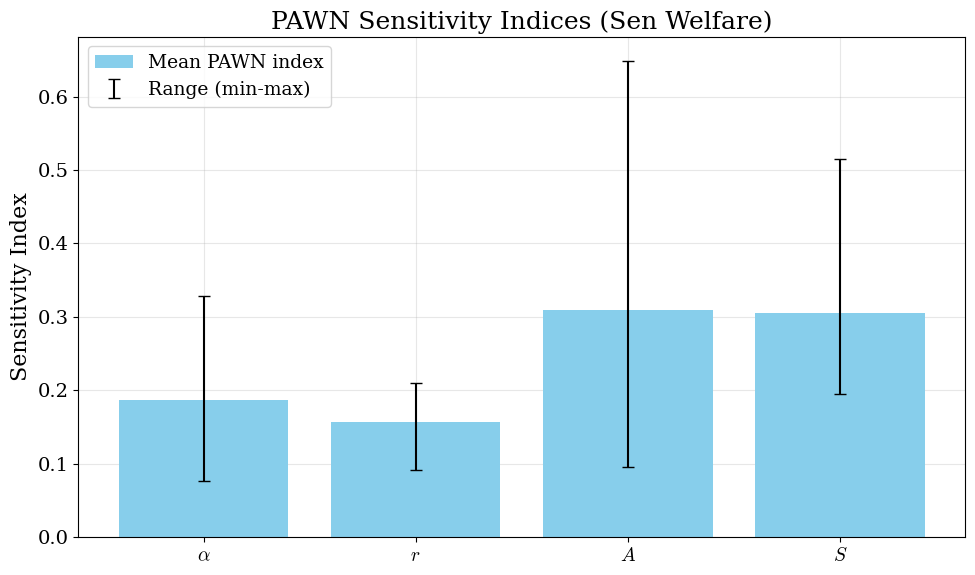

In [15]:
results = pawn.analyze(problem, np.array(X), np.array(Y))

x = np.arange(len(results['names']))
plt.figure(figsize=(10,6))

# Mean ± min/max
plt.bar(x, results['mean'], color='skyblue', label='Mean PAWN index')
plt.errorbar(
    x,
    results['mean'],
    yerr=[results['mean'] - results['minimum'], results['maximum'] - results['mean']],
    fmt='none',
    ecolor='black',
    capsize=4,
    label='Range (min-max)'
)

plt.xticks(x, results['names'])
plt.ylabel("Sensitivity Index")
plt.title("PAWN Sensitivity Indices (Sen Welfare)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()